# Import required libraries

In [1]:
import pandas as pd
from datetime import datetime
import missingno as msno


#### Load and read the data

In [2]:
food = pd.read_csv('food_orders_new_delhi.csv')
food.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


#### Clean the dataset for inconsistencies, missing values, or irrelevant information.


<Axes: >

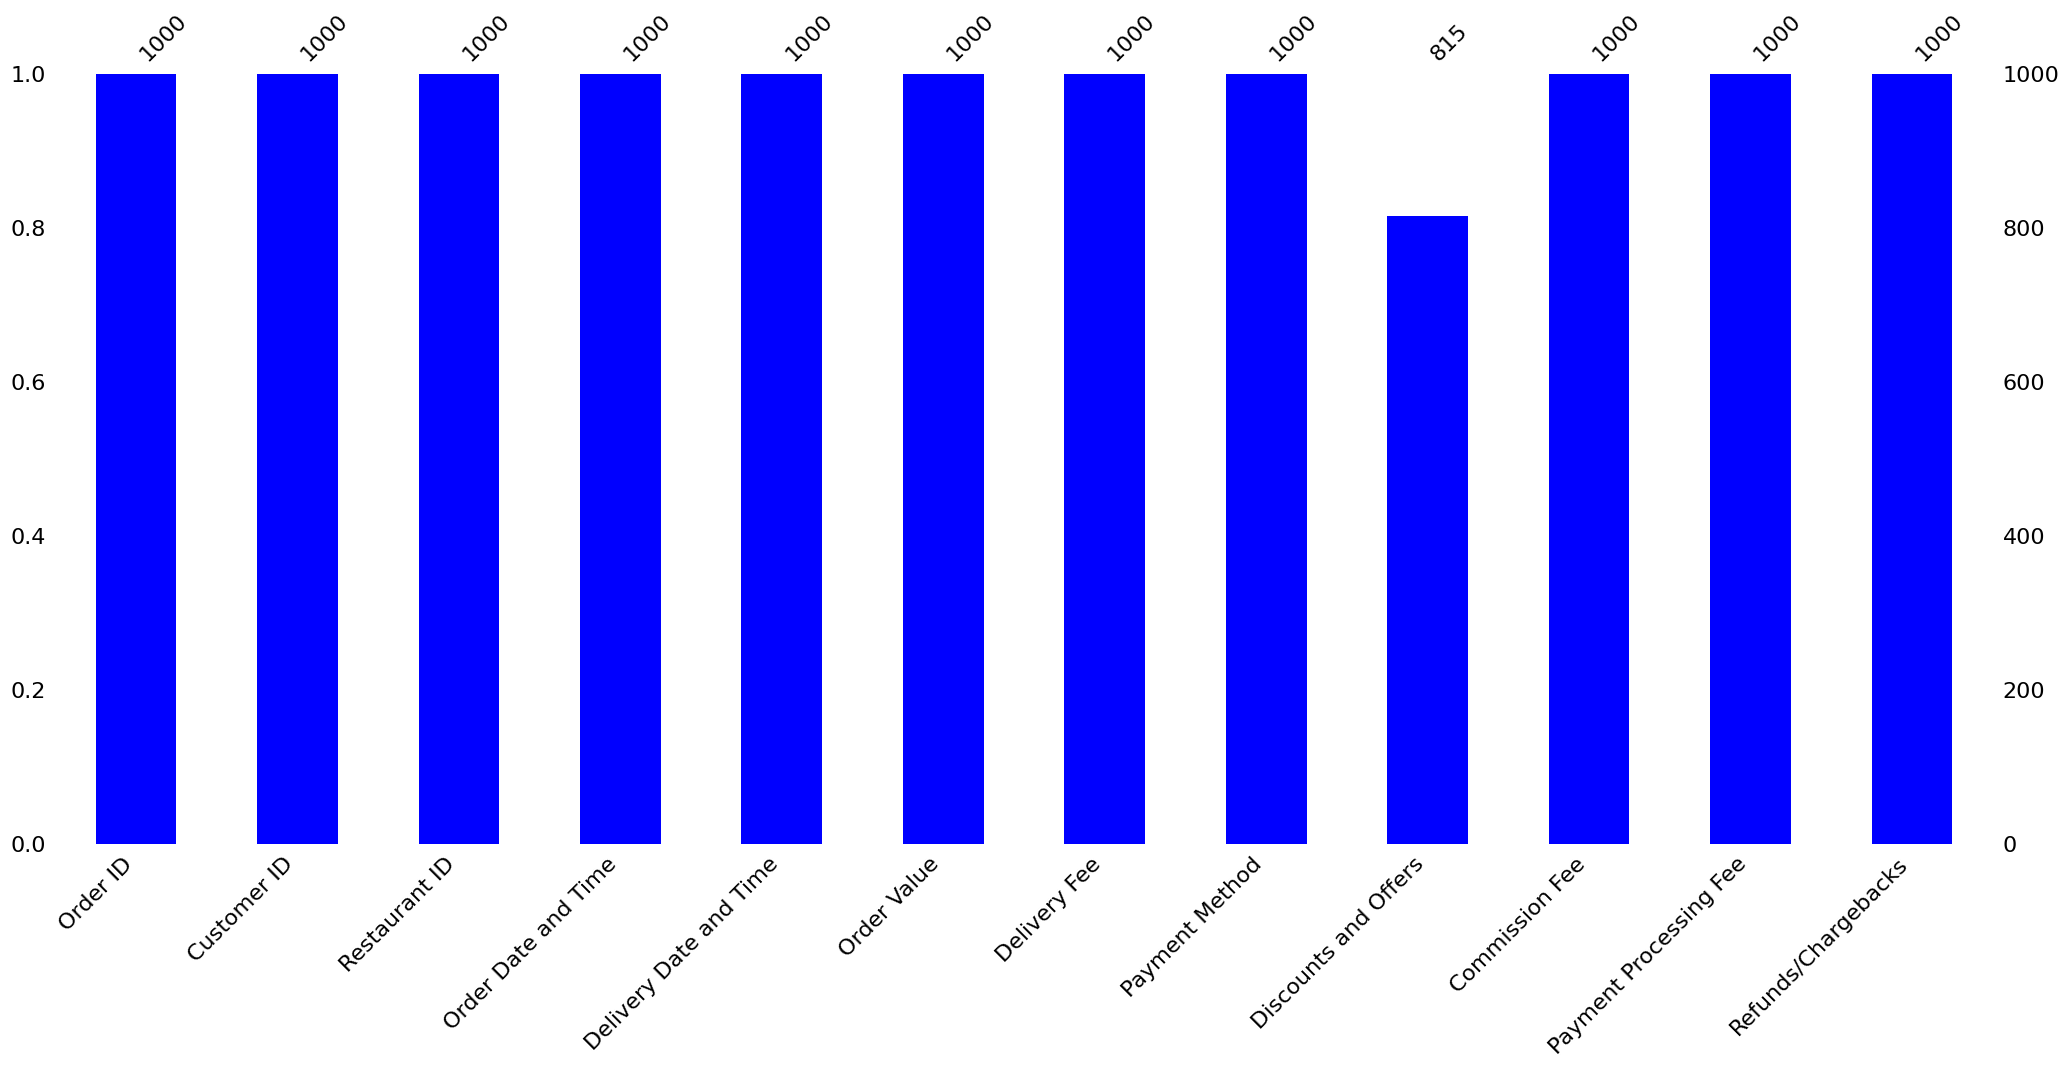

In [3]:
# Check if there are missing values on the dataset
msno.bar(food, color='blue')

In [4]:
# Fill missing values in 'Discounts and Offers' column with 'None'

food['Discounts and Offers'].fillna('None', inplace=True)
food['Discounts and Offers'].unique()

array(['5% on App', '10%', '15% New User', 'None', '50 off Promo'],
      dtype=object)

In [5]:
# Convert date and time columns to datetime

food['Order Date and Time'] = pd.to_datetime(food['Order Date and Time'])
food['Delivery Date and Time'] = pd.to_datetime(food['Delivery Date and Time'])
food[['Order Date and Time', 'Delivery Date and Time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order Date and Time     1000 non-null   datetime64[ns]
 1   Delivery Date and Time  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 15.8 KB


In [6]:
# There are 4 kinds of 'Discounts and Offers' - '5% on App', '10%', '15% New User', nan, and '50 off Promo'
# So, we can create a function to extract numeric values from the 'Discounts and Offers' string as below

def extract_discount(discount_str):
    if 'off' in discount_str:
        # Fixed amount off
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        # Percentage off
        return float(discount_str.split('%')[0])
    else:
        # No discount
        return 0.0

In [7]:
# Apply the function to create a new 'Discount Value' column

food['Discount Percentage'] = food['Discounts and Offers'].apply(lambda x: extract_discount(x))

In [8]:

# Calculate the discount amount based on the order value for percentage discounts

food['Discount Amount'] = food.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] > 1
                                                   else x['Discount Percentage'], axis=1)

# Adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column

food['Discount Amount'] = food.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)
print(food[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head())
print()
print(food.info())

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                 None                  0.0             0.00
4         1992         50 off Promo                 50.0           996.00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             

### Brief Summary
* 'Order Date and Time' and 'Delivery Date and Time' columns have been converted to datetime format.

* A new column, which is 'Discount Amount', has been calculated based on the 'Discounts and Offers' column. 

* Discount Percentage has been added to represent the discount rate or fixed amount discount directly.

# Cost and Profitability Analysis